In [9]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt, cm as cm, mlab as mlab
import matplotlib
import seaborn as sns; sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture as GMM
from collections import defaultdict
import os
import turchin

In [10]:
# read csv/excel data files 
dataPath1 = os.path.abspath(os.path.join("./..","data","pnas_data1.csv")) #20 imputed sets
pnas_data1 = pd.read_csv(dataPath1)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [18]:
# format data 

# extract 9 Complexity Characteristic variables 
features = ['PolPop', 'PolTerr', 'CapPop', 'levels', 'government','infrastr', 'writing', 'texts', 'money']
imputed_feature = 'irep'

# take subset of original data table with 9 CCs and change it into numpy array 
data_mat = pnas_data1.loc[:, features].values
scaler = StandardScaler()
scaler.fit(data_mat)
scaled = scaler.transform(data_mat)
P, D, Q = turchin.svd(scaled)
data = np.matmul(scaled, Q.T) # data matrix is obtained by multiplying initial data matrix with rotation matrix
ngas = pnas_data1.NGA.unique().tolist() # list of unique NGAs from the dataset

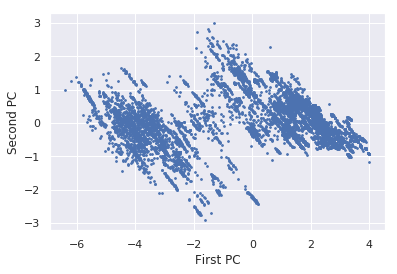

In [19]:
# 2-d scatter plot with two main principal components as axes using all 20 imputed sets

fig = plt.figure()
X, Y = data[:, 0], data[:, 1]

plt.scatter(X, Y, s=3)
plt.xlabel('First PC')
plt.ylabel('Second PC')
plt.show()
plt.close()

In [20]:
# Get the data from just the first imputed feature.
pnas_subset = pnas_data1.loc[pnas_data1[imputed_feature] == 1]
data_first_mat = pnas_subset.loc[:, features].values
scaled_first = scaler.transform(data_first_mat)
data_sub = np.matmul(scaled_first, Q.T)

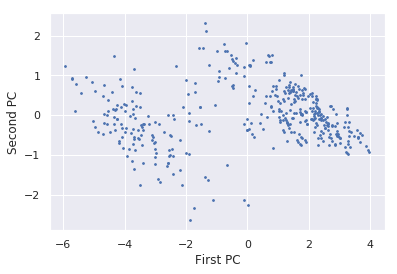

In [21]:
# Plot the scatter of the first two
fig = plt.figure()
X, Y = data_sub[:, 0], data_sub[:, 1]

plt.scatter(X, Y, s=3)
plt.xlabel('First PC')
plt.ylabel('Second PC')
plt.savefig('two_PC_one_imputation.png', transparent=True)
plt.show()
plt.close()

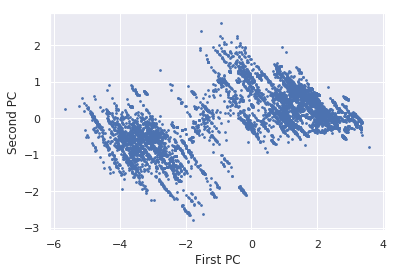

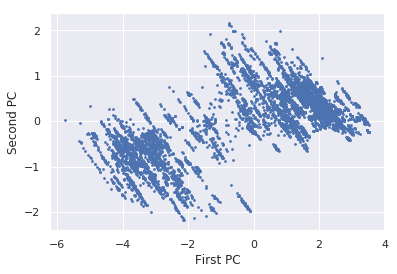

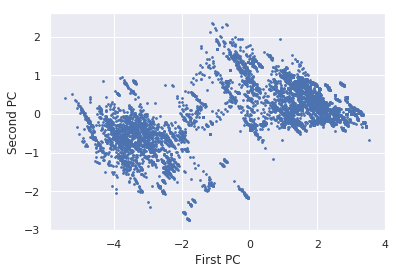

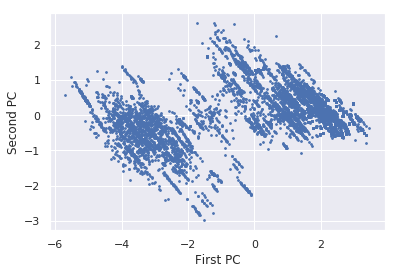

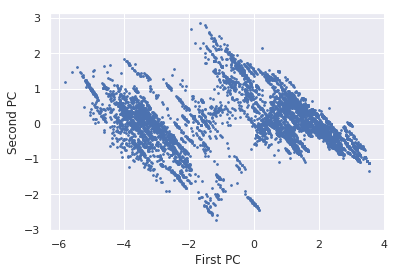

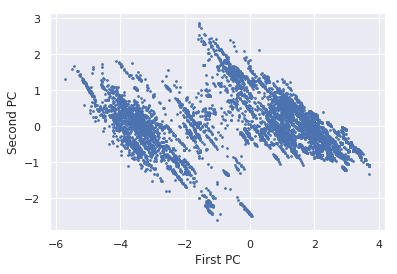

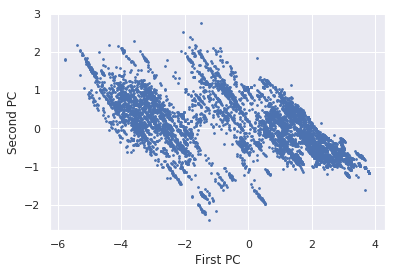

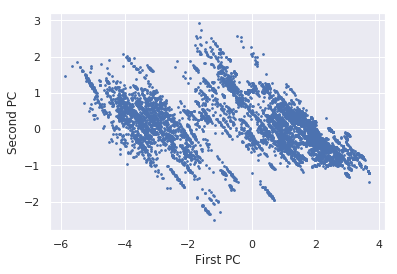

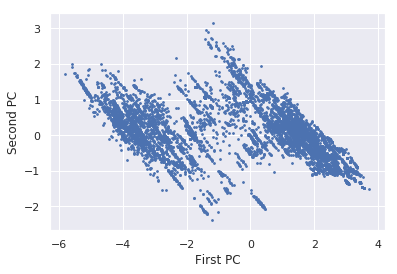

In [25]:
# Alternately, try zeroing out each CC individually.
# It's possible that the streaks are caused because some of the CCs
# are effectively 'binned' to specific values.
for cc in range(len(features)):
    mat = np.copy(scaled)
    mat[:, cc] = 0
    mat = np.matmul(mat, Q.T)
    
    fig = plt.figure()
    X, Y = mat[:, 0], mat[:, 1]

    plt.scatter(X, Y, s=3)
    plt.xlabel('First PC')
    plt.ylabel('Second PC')
    plt.show()
    plt.close()

# We see that any individual CC removed doesn't change the artifacts
# of the streakiness 
